In [1]:
from ml5_ipynb import ml5_nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
df = pd.read_csv('data/co2stats.csv')
df.head()

,val,city_name,city_name_cdp,reporting_year_cdp,scope1_ghg_emissions_tons_co2e,year_of_emission,latitude_degrees,longitude_degrees,country,region,population_cdp,population_year_cdp
0,1,Abington,Abington Township,2016,193345.0,2010,40.100,-75.099722,USA,North America,55310,2010
1,2,Addis Ababa,Addis Ababa City Administration,2016,3708292.0,2012,9.030,38.740000,Ethiopia,Africa,3384569,2008
2,3,Adelaide,City of Adelaide,2016,63724.0,2013,-34.929,138.601000,Australia,Oceania,23169,2015
3,7,"Ajax, ON","Town of Ajax, ON",2016,6354.0,2008,43.858,-79.036389,Canada,North America,109600,2011
4,8,Albany,City of Albany,2017,663997.0,2010,42.653,-73.757222,USA,North America,97856,2010


In [3]:
data = df[['population_cdp','scope1_ghg_emissions_tons_co2e']].to_dict('list')
x = np.asarray(data['population_cdp'])
y = np.asarray(data['scope1_ghg_emissions_tons_co2e'])

In [4]:
options = dict(
  inputs=['population_cdp'],
  outputs=['scope1_ghg_emissions_tons_co2e'],
  task='regression',
  learningRate= 0.001,
  debug=True
)

nn = ml5_nn.neuralNetwork(options)

In [5]:
layers = [dict(
            type = 'dense',
            units = 64,
            activation='relu',
            ),
          dict(
            type = 'dense',
            units = 128,
            activation='relu',
          ),
          dict(
            type='dense',
            units = 64,
            activation='sigmoid',
          ),
          dict(
            type='dense',
            activation='sigmoid',
          )
    ]
nn.add_layer(layers)

In [6]:
nn.initialize_framework()

In [7]:
# add data
for i in range(len(x)):
    inp = {'population_cdp':x[i]}
    outp = {'scope1_ghg_emissions_tons_co2e':y[i]}
    nn.add_data(inp,outp)

In [8]:
nn.normalize_data()
trainingOptions = {'epochs': 100, 'batchSize' : 12}
nn.train_data(trainingOptions)

.....................................................................................................................................................................................................................................................................done


In [9]:
testInputs = [
  100,
  50000,
  100000,
  500000,
  2500000,
  5000000,
  10000000,
  15000000,
]

In [10]:
for i in range(len(testInputs)):
    inp = {'population_cdp':testInputs[i]}
    nn.predict_data(inp)

In [11]:
predict_y = [i[0]['value'] for i in nn.predict_callback_list]

In [12]:
predict_y

[5803517.468790412,
 5804217.153474152,
 5804931.889764488,
 6113353.500421405,
 8121376.295043945,
 11373840.980321407,
 20511697.14721346,
 31932746.140140057]

In [13]:
# test on train data
nn.predict_callback_list = []
for i in range(len(x)):
    inp = {'population_cdp':x[i]}
    nn.predict_data(inp)

In [16]:
predict_train_y = [i[0]['value'] for i in nn.predict_callback_list]

In [17]:
np.sqrt(np.mean((np.asarray(predict_train_y)-y)**2))

7599240.697521548

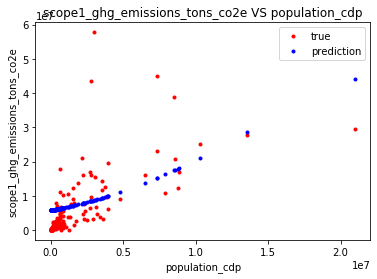

In [18]:
plt.plot(x,y,'.r', label='true')
plt.plot(x,predict_train_y,'.b', label='prediction')
plt.xlabel('population_cdp')
plt.ylabel('scope1_ghg_emissions_tons_co2e')
plt.title('scope1_ghg_emissions_tons_co2e VS population_cdp')
plt.legend()